In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
from system import *

In [2]:
# creating the star objects

st1 = star([1.0,0.0],[0.0,2*np.pi])

st2 = star([2.0,0.0],[0.0,2*np.pi])

st3 = star([0.5,0.0],[0.0,2*np.pi])

st4 = star([3.0,0.0],[0.0,2*np.pi])

st_list = [st1,st2,st3,st4]

In [17]:
%reload_ext autoreload
%autoreload 2
%pylab
%matplotlib inline
from IPython.display import display, clear_output

# running the iteration function

tf = 100
dt = 0.001
M = 

test_system = system3d(st_list)

test_system.iterate(tf,dt)


Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


TypeError: __init__() missing 1 required positional argument: 'M'

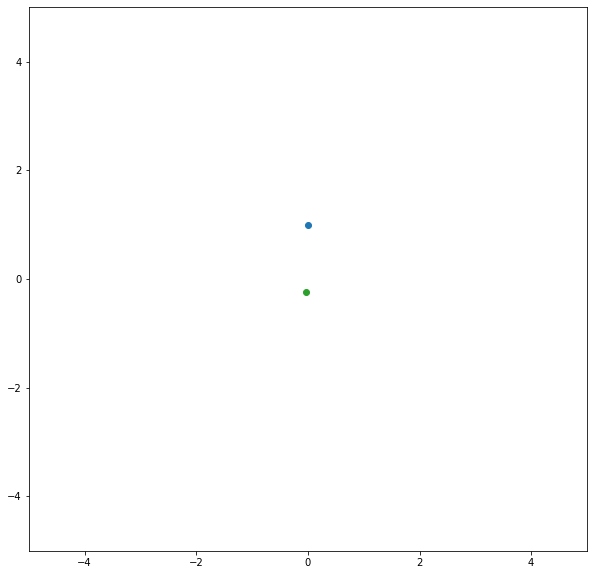

KeyboardInterrupt: 

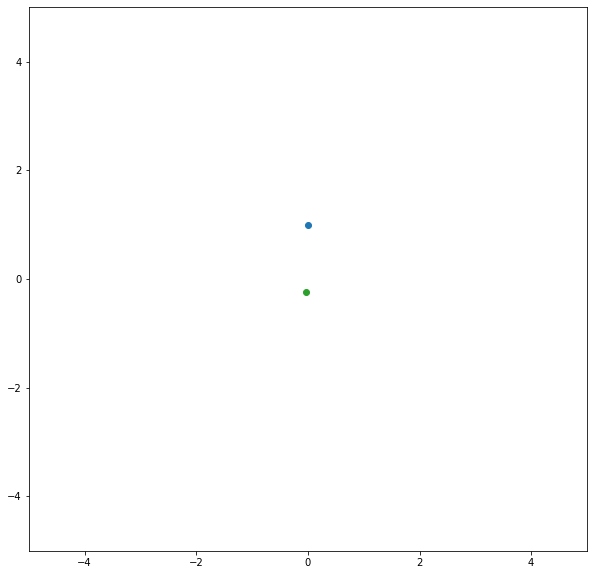

In [18]:
# showing the animation of the movement of the stars

fig, ax = plt.subplots(figsize = (10,10))

n = np.arange(0,tf*1/dt,50)

for i in n:
    
    test_system.plot(st_list,int(i),[-5,5],[-5,5])

    clear_output(wait=True) 
    display(fig)            
    fig.clear()             
